In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract

In [2]:
img_cv = cv2.imread('./Selected/052.jpeg')

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
type(img_cv)

numpy.ndarray

In [4]:
img_pl = PIL.Image.open('./Selected/052.jpeg')

In [5]:
type(img_pl)

PIL.JpegImagePlugin.JpegImageFile

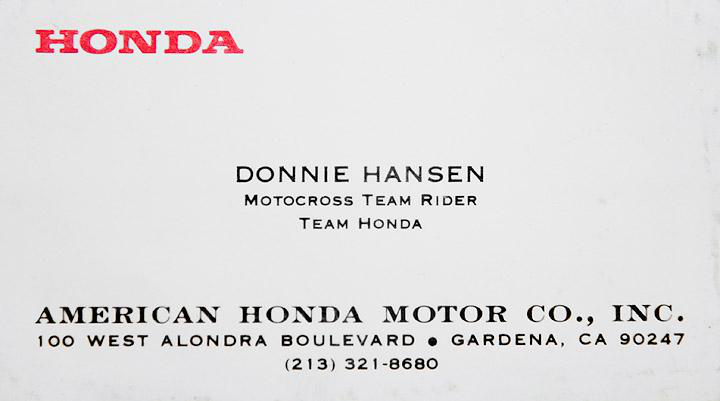

In [6]:
img_pl

### Text from Image

In [8]:
# text_cv = pytesseract.image_to_string(img_cv)

In [ ]:
print(text_cv)

In [16]:
text_pl = pytesseract.image_to_string(img_pl)

In [17]:
print(text_pl)

HONDA

DONNIE HANSEN
MOTOCROSS TEAM RIDER
TEAM HONDA

AMERICAN HONDA MOTOR CO., INC.
100 WEST ALONDRA BOULEVARD e GARDENA, CA 90247
(213) 321-8680



### Image to Data

In [18]:
data = pytesseract.image_to_data(img_cv)

In [25]:
#data.split('\n')
dataList = list(map(lambda x: x.split('\t'),data.split('\n')))
df = pd.DataFrame(dataList[1:],columns=dataList[0])

In [28]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,720,401,-1,
1,2,1,1,0,0,0,36,29,207,25,-1,
2,3,1,1,1,0,0,36,29,207,25,-1,
3,4,1,1,1,1,0,36,29,207,25,-1,
4,5,1,1,1,1,1,36,29,207,25,95,HONDA
5,2,1,2,0,0,0,237,166,246,63,-1,
6,3,1,2,1,0,0,237,166,246,63,-1,
7,4,1,2,1,1,0,237,166,246,16,-1,
8,5,1,2,1,1,1,237,166,112,16,96,DONNIE
9,5,1,2,1,1,2,364,166,119,16,96,HANSEN


In [33]:
df.dropna(inplace=True) # drop the missing in rows
col_int = ['level','page_num','block_num','par_num','line_num','word_num','left','top','width','height','conf']
df[col_int] = df[col_int].astype(int)

In [34]:
df.dtypes

level         int32
page_num      int32
block_num     int32
par_num       int32
line_num      int32
word_num      int32
left          int32
top           int32
width         int32
height        int32
conf          int32
text         object
dtype: object

In [41]:
image = img_cv.copy()
level = 'word'
for l,x,y,w,h,c,txt in df[['level','left','top','width','height','conf','text']].values:
    #print(l,x,y,w,h,c)
    if level == 'page':
        if l == 1:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,0),2)
        else:
            continue
            
    elif level == 'block':
        if l == 2:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        else:
            continue
    
    elif level == 'para':
        if l == 3:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        else:
            continue
    
    elif level == 'line':
        if l == 4:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
            
    elif level == 'word':
        if l == 5:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(image,txt,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),2)
        else:
            continue
            
cv2.imshow("bounding box",image)
cv2.waitKey()
cv2.destroyAllWindows()